In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow as tf

In [2]:
df = pd.read_excel('Model Data.xlsx',index_col='Yr-Wk')
df.head()

,Year,Week,Quantity,Discount Avg,Seasonality Index
Yr-Wk,,,,,
2017-13,2017,13,1.008940e+05,4.0,0.015919
2017-14,2017,14,1.219300e+06,4.4,0.205102
2017-15,2017,15,1.309851e+06,5.0,0.232854
2017-16,2017,16,1.366673e+06,4.4,0.249688
2017-17,2017,17,1.400649e+06,4.6,0.260788


In [3]:
df.shape

(229, 5)

In [4]:
train=df[['Seasonality Index','Discount Avg','Quantity']]
train.shape

(229, 3)

In [5]:
def createXY(dataset,n_past,n_future):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)-n_future+1):
        #print(dataset.iloc[i - n_past:i, 0:dataset.shape[1]])
        dataX.append(dataset.iloc[i - n_past:i, 0:dataset.shape[1]])
        dataY.append(dataset.iloc[i+n_future-1:i+n_future,-1])
    return np.array(dataX),np.array(dataY)

In [6]:
xtrain,y=createXY(train,1,0)
xtrain.shape,y.shape

((229, 1, 3), (229, 1))

In [7]:
xtrain.shape

(229, 1, 3)

In [8]:
type(xtrain)

numpy.ndarray

In [9]:
model1=tf.keras.models.load_model('LSTM_MAPE(11).h5')
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 1, 64)             17408     
                                                                 
 dropout_35 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_36 (LSTM)              (None, 1, 32)             12416     
                                                                 
 dropout_36 (Dropout)        (None, 1, 32)             0         
                                                                 
 lstm_37 (LSTM)              (None, 16)                3136      
                                                                 
 dropout_37 (Dropout)        (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)               

In [10]:
mape=model1.evaluate(xtrain,train['Quantity'])
print('MAPE:',mape)

8/8 [==============================] - 1s 3ms/step - loss: 11.7212
MAPE: 11.721203804016113


In [11]:
pred=model1.predict(xtrain)

8/8 [==============================] - 0s 5ms/step


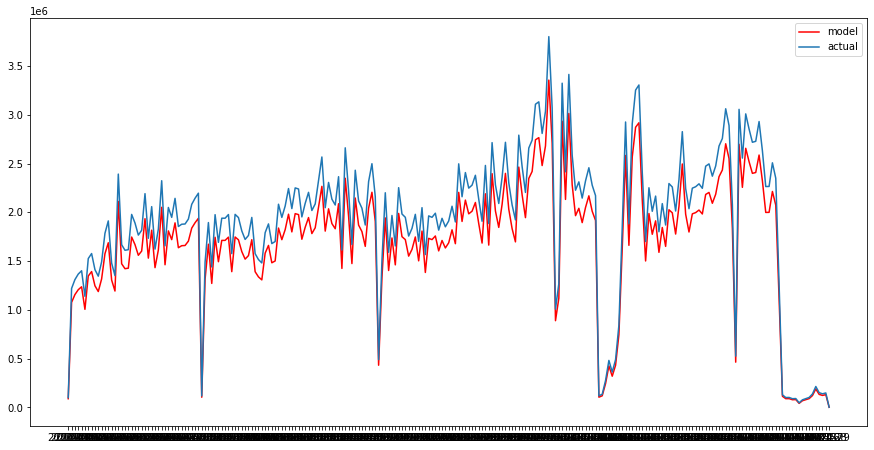

In [12]:
plt.figure(figsize=(15, 7.5))
plt.plot(pred, color='r', label='model')

#plt.axvspan(train.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(train['Quantity'], label='actual')
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X=xtrain
y=train['Quantity']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)

In [16]:
x_train.shape,x_test.shape

((160, 1, 3), (69, 1, 3))

3/3 [==============================] - 0s 4ms/step


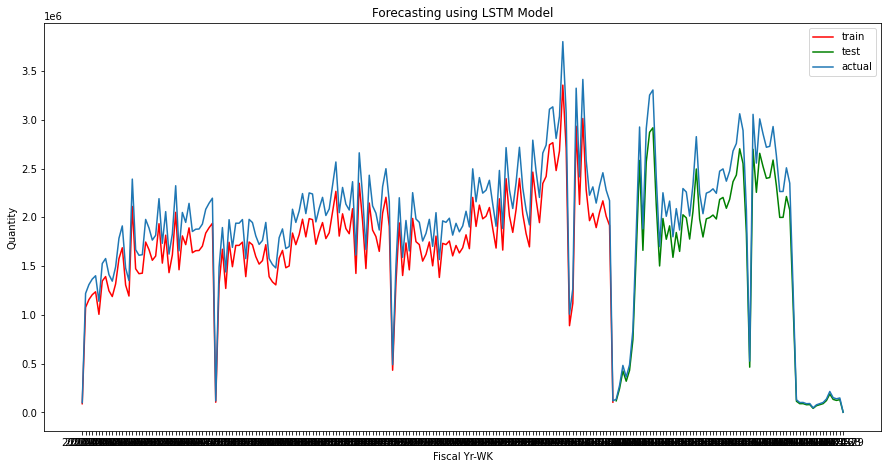

In [18]:
plt.figure(figsize=(15, 7.5))
pred1=model1.predict(x_train)
pred2=model1.predict(x_test)
pred1=pd.DataFrame(pred1).set_index(df.index[:-69])
pred2=pd.DataFrame(pred2).set_index(df.index[-69:])
plt.plot(pred1, color='r', label='train')
plt.plot(pred2, color='g', label='test')
plt.plot(train['Quantity'], label='actual')
plt.title('Forecasting using LSTM Model')
plt.xlabel('Fiscal Yr-WK')
plt.ylabel('Quantity')
plt.legend()
plt.show()